# Reinforcement Learning

Deepmind marked the year 2017 by creating the best Go player in the world. How did they achieve this? With deep learning, of course, but more precisely with reinforcement learning.

Deep Blue beat human chess players with traditional game analysis. But this was not possible with Go, which was never solvable by computers until Deepmind created their network and its training methods. Because without training, the network is useless!

This notebook, will include the following:
* Look at different types of reinforcement learning
* Explore the concept of Q-learning
* Estimate a Q function via a table and via a neural network
* Make a network play an Atari game using Q-learning

## Types of reinforcement learning

Reinforcement learning is part of the unsupervised learning space. This only thing that it can be done is to use the network, and if the network gets a good result, then it is used to enhance the model with backpropagation. Otherwise, try some more.

This approach can also be used in finance to optimize a portfolio; this can also be used for robots. In the past, people use genetic algorithms to train a walking robot, but now reinforcement learning can also be used for this task!

Now there are neural networks that can come to the rescue. Look at a few of the main types of networks that have been given attention in the last few years.

### Policy and value network

Start with solving Go. At each turn, the player places one of their stones (either white for the first player or black for the second) on the board, possibly changing the color of other stones in the process, and the games ends with whoever has the most stones of their color.

The issue is that the board is quite big, 19 x 19 squares, meaning that at the beginning there is a very big set of possible options. Which one leads to winning the game?

For chess, this was solved without neural networks. For Go, it's not possible.

Enter deep learning. For Go, different possible moves still need to be analysed, but it won't try to be as exhaustive as in chess; Monte-Carlo Tree Search (MCTS) will instead be used. This means that a random uniform number will be drawn and from this number one move will be played. This is done for several moves in advance and then assess whether it is closer to winning or not.

But as it was seen before, it can't measure this is Go, so how is a move selected for the search and how it can be decided if it is winning or losing? This is why there are two networks. The policy network will provide the probabilities for the next move, and the value network will provide one value—either it thinks it is winning or it is losing.

Combined together, it is possible to generate a set of possible moves with their odds of success, and they can be played. At the end of the game, the information is used to reinforce the two networks.

Later, the new AlphaGo Zero merged these networks together. So it doesn't have to have a dichotomy for such problems, as it is possible to design an architecture that does both.

### Q-network

Actually, Deepmind started making a name for themselves before Go. They were using what is called a Q-network to solve Atari games. These are a set of simple games where the gamer can play only up to 10 moves at each stage.

With these networks, the goal is to estimate a long-term reward function (like the number of points) and which move will maximize it. The reward function is the following:
# ![Reward function](./Reward%20function.PNG)

r is the reward, γ is a discounting factor (future gains are not as important as the immediate reward), s is the current state of the game, and a is the action we could take.

Of course, as it is continuously learning, it is also continuously forgetting, and the network will have to be fed with past training as well. To use a metaphor, it will end up running without being able to walk, which is quite useless.

## Excelling at games

In the remainder of this notebook, Q-games will be used with the gym package. It offers a standard API for playing different types of games, so it's the perfect test case.

### A small example

Anaconda doesn't ship this package, so it has to be installed though pip.

The Atari part of the gym won't be used, but it will be required for the breakout game.

From this package, an environment can be created for different games, like this:

In [1]:
import gym

env = gym.make('FrozenLake-v1')
# env = gym.make('FrozenLake-v1', render_mode="human")

This creates a new environment for the text game FrozenLake. It consists of four four-character strings, starting with S and ending up at G, the goal. But there are holes (H) on the way to this goal, and ending up there makes you lose the game:
* SFFF
* FHFH
* FFFH
* HFFG

From the environment, env.observation_space.n, the size of the observation space can be obtained which is 16 here (where the player is located) and the size of the action space env.action_space.n, which is 4 here.

As this is a small toy example, an estimation of Q(s, a) can be created:

In [2]:
import numpy as np

Q = np.zeros((env.observation_space.n, env.action_space.n))
# Set learning hyperparameters
lr = .8
y = .95
num_episodes = 2000
# Let's run!
for i in range(num_episodes):
    # Reset environment and get first new observation (top left)
    s = env.reset()[0]
    # Do 100 iterations to update the table
    for i in range(100):
        # Choose an action by picking the max of the table
        # + additional random noise ponderated by the episode
        a = np.argmax(Q[s, :] + np.random.randn(1, env.action_space.n) / (i + 1))
        # Get new state and reward from environment after chosen step
        s1, r, d, _, _ = env.step(a)
        # Update Q-Table with new knowledge
        Q[s, a] = Q[s, a] + lr*(r + y*np.max(Q[s1, :]) - Q[s, a])
        s = s1
        if d == True:
            break
env.close()

The content of the table Q can now be displayed:

In [3]:
print(Q)

[[2.35353103e-01 2.84779089e-01 2.23429867e-01 2.12372557e-01]
 [1.88241401e-01 4.52001808e-02 1.80317684e-01 2.18930039e-01]
 [2.28871423e-01 1.75582941e-01 2.14385818e-01 2.12904816e-01]
 [7.22573763e-03 2.40670417e-02 3.39415749e-02 1.91968138e-01]
 [3.23488676e-01 3.15051830e-01 4.75992334e-02 2.75157380e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.89037491e-02 1.87592179e-04 4.54057436e-02 1.61117631e-06]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.96062910e-01 7.93530464e-02 7.27409368e-02 6.02012156e-01]
 [1.28748559e-01 7.34690744e-01 3.35043865e-02 1.82422165e-02]
 [9.18763811e-01 5.14144201e-03 3.51944512e-02 4.54669877e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.13667164e-02 6.32686398e-02 9.15365227e-01 6.92923602e-02]
 [1.04707356e-01 9.99730825e-01 1.90092743e-01 2.20898147e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

All the entries that have 0 can be seen in some of the rows; these are the holes and the final goal stage. Starting from the first step, go through this table to a next step with probabilities given by these rows (after normalization).

Of course, this is not a network, so use Tensorflow to make a network learn this table.

### Using Tensorflow for the text game

Think of the type of architecture which is needed here. There is the state of the game as the input, and the goal is to make one of four values as the output. The game is simple enough that there is an optimal strategy, a unique path to get from the start to the goal. This means that the network can be very simple, with just one layer and a linear output: 

In [4]:
import tensorflow as tf

y = 0.99
e = 0.1 # 1 in 10 samples, a new action was chosen for the network
num_episodes = 2000
learning_rate = 0.1

inputs = tf.keras.Input(shape=[None, 16], dtype=tf.float32, name="input")
Qout = tf.keras.layers.Dense(units=4, use_bias=False, name="dense", kernel_initializer=tf.random_uniform_initializer(minval=0, maxval=.0125))(inputs)
model = tf.keras.Model(inputs=inputs, outputs=Qout)
# The optimizer will try to optimize
trainer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

def train_step(inputs, nextQ):
    """Trains `net` on `example` using `optimizer`."""
    with tf.GradientTape() as tape:
        Qout = model(inputs)
        loss = tf.reduce_sum(tf.square(nextQ - Qout))
    variables = model.trainable_variables
    gradients = tape.gradient(loss, variables)
    trainer.apply_gradients(zip(gradients, variables))
    return loss

For the training, it is needed to reintroduce new options, like the randomness that had been in the table before. To accomplish this, for every 10 predictions, a random action is sampled (this is called an epsilon-greedy strategy, and a variation of it will be reused later with the Atari games). Otherwise, the actual Q value is computed and the network is trained to match this result (updating the dense layer weights):

In [5]:
jList = []
rList = []
for i in range(num_episodes):
    s = env.reset()[0]
    rAll = 0
    for j in range(100):
        targetQ = model(np.identity(16)[s:s+1]).numpy()
        a = tf.argmax(targetQ, 1).numpy()
        # randomly choose a new state
        # that may have not been encountered before
        if np.random.rand(1) < e:
            a[0] = env.action_space.sample()
        s1, r, d, _, _ = env.step(a[0])
        # Obtain the Q' values by feeding
        # the new state through the network
        Q1 = model(np.identity(16)[s1:s1 + 1])
        # Obtain maxQ' and set the target value for chosen action.
        targetQ[0, a[0]] = r + y*np.max(Q1)
        # Train the network using target and predicted Q values
        train_step(np.identity(16)[s:s+1], targetQ)
        rAll += r
        s = s1
        if d == True:
            # Reduce chance of random action as the model is trained.
            e = 1 / ((i // 50) + 10)
            break
    jList.append(j)
    rList.append(rAll)
env.close()
print("Percent of succesful episodes: {}".format((sum(rList) / num_episodes)*100))

Percent of succesful episodes: 39.25


With this strategy, the layer gets around 40% success, but this value is biased. If we plot the evolution of the reward (averaged through time over 20 episodes), the network improves
drastically over time:

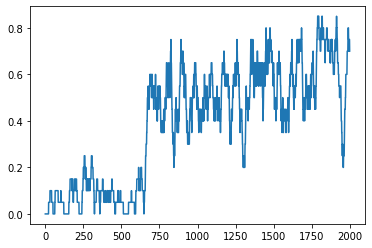

In [6]:
from scipy.signal import lfilter
from matplotlib import pyplot as plt

plt.plot(lfilter(np.ones(20)/20, [1], rList))
plt.show()

And the same happens with the alive time:

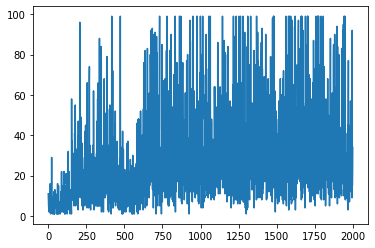

In [7]:
plt.plot(jList)
plt.show()

It can be seen that when the network started to get better at rewards, it also managed to keep the player alive longer. Unfortunately, the network is still not the best at this task. A human would take only eight steps to finish the game.

A similar strategy can now be used for the Atari games.

### Playing breakout

The Atari games can be played in several ways. The first is the interaction way. Either a memory view or the displayed image (which is always the same) can be used.

Start with an empty, simple breakout game:

In [8]:
# Import the gym module
import gym
# Create a breakout environment
env = gym.make('ALE/Breakout-v5')
# env = gym.make('ALE/Breakout-v5', render_mode='human')
# Reset it, returns the starting frame
frame = env.reset()

is_done = False
while not is_done:
    # Perform a random action, returns the new frame, reward and whether the game is over
    frame, reward, is_done, _, _ = env.step(env.action_space.sample())
env.close()

The only thing that now needs to be modified is how to get the new step for the game. Well, it needs more than that: first it is needed to train a model!

Look at the context. Images can be obtained from the environment (they are 160 x 210 pixels), and considering the fact that lots of previous images will be required, this size may be too much to fit on one computer. One pixel can be dropped out of two in all directions, for instance, so this is what preprocess will achieve. Two functions that transpose the internal state will also be added. The reason is that there are images that are 84 x 105 with one channel, but past images need to be used to know in which direction the ball moves. To achieve this, this state is transposed on the fly to have an image that is 84 x 105 x state_length:

In [9]:
import os
import six
import numpy as np
import tensorflow as tf
import random
import itertools
from collections import deque , namedtuple

Transition = namedtuple("Transition", ["state", "action", "reward", "next_state", "done"])
def to_grayscale(img):
    return np.mean(img, axis=2).astype(np.uint8)

def downsample(img):
    return img[::2, ::2]

def preprocess(img):
    return to_grayscale(downsample(img))[None,:,:]

def adapt_state(state):
    return np.expand_dims(np.float32(np.transpose(state, (2, 1, 0)) / 255.0), axis=0)

def adapt_batch_state(state):
    return np.transpose(np.array(state), (0, 3, 2, 1)) / 255.0

def get_initial_state(frame, state_length):
    processed_frame = preprocess(frame)
    state = [processed_frame for _ in range(state_length)]
    return np.concatenate(state)

Although all the Atari games can be made work with the network that are being built, there is one issue. Every other pixel is just being taken in each direction. But what happens if space invaders are being played with a one-pixel-width missile? There is a 50/50 chance that we will die without seeing the missile!

To make this better, skimage.rescale could be used instead. For breakout, it isn't needed, so this is left as an exercise.

A set of hyperparameters is now going to be written, as well as some constants for the game, like the name of the environment and the size of the image:

In [10]:
env_name = 'ALE/Breakout-v5'
width = 80 # Resized frame width
height = 105 # Resized frame height

The network is need to be trained for a very long time, so play 12000 games. To predict a new action, the past 4 images will be used:

In [11]:
n_episodes = 12000 # Number of runs for the agent
state_length = 4 # Number of most frames that is inputted to the network

The parameters are also going to need to be set for the Q function:

In [12]:
gamma = 0.99 # Discount factor

At the beginning, the goal is to test very often a random action (left or right for breakout). Then during the training, the randomness will be progressively removed (this is the epsilon-greedy strategy). Each time the network is run, this one step is considered, so reduce this random factor by over 1 million steps:

In [13]:
# During all these steps, epsilon is progressively lowered
exploration_steps = 1000000
initial_epsilon = 1.0 # Initial value of epsilon in epsilon-greedy
final_epsilon = 0.1 # Final value of epsilon in epsilon-greedy

The collection of actions need to be filled in, so at the beginning it isn't trained, the game is just let play with random actions. This is going to be the initial training set, and over time all the games will be added to this set of training set. When it hits 400000 elements, the old is started dumping, more random training states:

In [14]:
# Number of steps to populate the replay memory before training starts
initial_random_search = 20000
replay_memory_size = 400000 # Number of states that is kept for training
replay_memory_init_size = 40000
batch_size = 32 # Batch size
network_update_interval = 10000 # The frequency with which the target network is updated

RMSProp will be used to train the network, a very low learning rate with momentum is set:

In [15]:
learning_rate = 0.00025 # Learning rate used by RMSProp
momentum = 0.95 # momentum used by RMSProp
# Constant added to the squared gradient in the denominator
# of the RMSProp update
min_gradient = 0.01

Finally, the trained network will be stored through time (with some checkpoints so that the training can be restarted at some partially trained state), and some information will be stored to Tensorboard, like the reward that was found and the length of a game:

In [16]:
network_path = 'saved_networks/' + env_name
tensorboard_path = 'summary/' + env_name
save_interval = 300000 # The frequency with which the network is saved

The network class can now be created. One instance for each network will be created. Yes, two networks are needed—one to estimate the next action to take and one to estimate the Q values or targets. From time to time, the network will be updated for action (named q_estimator here) to the target estimator (named target_estimator).

Keras were used in this case to build the network. It stacks three convolutional layers (without max pool layers, although some nodes are dropped to reduce the number of parameters) and then two dense layers. All of them use a relu activation later.

Note that keras is a high-level interface. In this example, Sequential is used which means that each layer connects to the previous one.

With the network, a cost function can now be created and it can be fed to an optimizer. Some summary reports are also added to check the distribution of Q or loss values:

In [17]:
class Estimator():
    """Q-Value Estimator neural network.
    This network is used for both the Q-Network and the Target Network.
    """
    def __init__(self, env, scope="estimator", summaries_dir=None, width=None, height=None, state_length=None, learning_rate=None, momentum=None, min_gradient=None):
        self.scope = scope
        self.num_actions = env.action_space.n
        self.epsilon = initial_epsilon
        self.epsilon_step = (initial_epsilon - final_epsilon) / exploration_steps
        # Writes Tensorboard summaries to disk
        self.summary_writer = None
        # Build the graph
        self.width = width
        self.height = height
        self.state_length = state_length
        self.learning_rate = learning_rate
        self.momentum = momentum
        self.min_gradient = min_gradient
        self.build_model()
        if summaries_dir:
            self.summary_dir = os.path.join(summaries_dir, "summaries_{}".format(scope))
            if not os.path.exists(self.summary_dir):
                os.makedirs(self.summary_dir)
            self.summary_writer = tf.summary.create_file_writer(self.summary_dir)
        
    def build_model(self):
        """
        Builds the Tensorflow graph.
        """
        self.model = tf.keras.Sequential()
        self.model.add(tf.keras.layers.Convolution2D(filters=32, kernel_size=8, strides=(4, 4), activation='relu', input_shape = (width, height, state_length), name="Layer1"))
        self.model.add(tf.keras.layers.Convolution2D(filters=64, kernel_size=4, strides=(2, 2), activation='relu', name="Layer2"))
        self.model.add(tf.keras.layers.Convolution2D(filters=64, kernel_size=3, strides=(1, 1), activation='relu', name="Layer3"))
        self.model.add(tf.keras.layers.Flatten(name="Flatten"))
        self.model.add(tf.keras.layers.Dense(512, activation='relu', name="Layer4"))
        self.model.add(tf.keras.layers.Dense(self.num_actions, name="Output"))
        self.optimizer = tf.keras.optimizers.RMSprop(learning_rate=self.learning_rate, momentum=self.momentum, epsilon=self.min_gradient)

    def train_step(self, x, y, actions):
        with tf.GradientTape() as tape:
            predictions = self.model(x)
            a_one_hot = tf.one_hot(actions, self.num_actions, 1.0, 0.0)
            q_value = tf.math.reduce_sum(tf.math.multiply(predictions, a_one_hot), axis=1)
            losses = tf.math.squared_difference(y, q_value)
            loss = tf.math.reduce_mean(losses)
        variables = self.model.trainable_variables
        gradients = tape.gradient(loss, variables)
        self.optimizer.apply_gradients(zip(gradients, variables))
        return predictions, losses, loss

    @tf.function
    def predict(self, s):
        return self.model(s)

    def update(self, s, a, y, global_step):
        predictions, losses, loss = self.train_step(s, y, a)
        if self.summary_writer:
            with self.summary_writer.as_default():
                tf.summary.scalar("loss", loss, step=global_step)
                tf.summary.histogram("loss_hist", losses, step=global_step)
                tf.summary.histogram("q_values_hist", predictions, step=global_step)
                tf.summary.scalar("max_q_value", tf.reduce_max(predictions), step=global_step)
        return loss

    def get_action(self, state):
        if self.epsilon >= random.random():
            action = random.randrange(self.num_actions)
        else:
            action = np.argmax(self.predict(adapt_state(state)))
        # Decay epsilon over time
        if self.epsilon > final_epsilon:
            self.epsilon -= self.epsilon_step
        return action

    def get_trained_action(self, state):
        action = np.argmax(self.predict(adapt_state(state)))
        return action

A method is added to wrap the prediction, as it will be used in several places—firstly in an update method that will actually train this estimator. There are also two methods to retrieve an action, either with an epsilon-greedy strategy or without (after the training):

In [18]:
def copy_model_parameters(estimator1, estimator2):
    """
    Copies the model parameters of one estimator to another.
    Args:
    estimator1: Estimator to copy the paramters from
    estimator2: Estimator to copy the parameters to
    """
    e1_params = sorted(estimator1.trainable_variables, key=lambda v: v.name)
    e2_params = sorted(estimator2.trainable_variables, key=lambda v: v.name)
    update_ops = []
    for e1_v, e2_v in zip(e1_params, e2_params):
        op = e2_v.assign(e1_v)
        update_ops.append(op)
    return update_ops

This is the function that will be calld to update one estimator from another. This creates a set of operations that will be run later:

In [19]:
def create_memory(env, state_length, replay_memory_init_size):
    # Populate the replay memory with initial experience
    replay_memory = deque()
    frame = env.reset()[0]
    state = get_initial_state(frame, state_length)
    for i in range(replay_memory_init_size):
        action = np.random.choice(np.arange(env.action_space.n))
        frame, reward, done, _, _ = env.step(action)
        next_state = np.append(state[1:, :, :], preprocess(frame), axis=0)
        replay_memory.append(Transition(state, action, reward, next_state, done))
        if done:
            frame = env.reset()[0]
            state = get_initial_state(frame, state_length)
        else:
            state = next_state
    return replay_memory

This function creates an empty replay memory. This is required so that the game can learn something. So random moves are just played for a while and hope it will make the network gain some first-hand knowledge of the game. Of course, there is also the epsilon-greedy strategy that will add new moves to the game later. This will also help a lot:

In [20]:
def update_op(summary_vars, summary_inputs):
    return [summary_vars[i].assign(summary_inputs[i]) for i in range(len(summary_vars))]

def setup_summary():
    episode_total_reward = tf.Variable(0., name="EpisodeTotalReward")
    episode_avg_max_q = tf.Variable(0., name="EpisodeAvgMaxQ")
    episode_duration = tf.Variable(0., name="EpisodeDuration")
    episode_avg_loss = tf.Variable(0., name="EpisodeAverageLoss")
    summary_vars = [episode_total_reward, episode_avg_max_q, episode_duration, episode_avg_loss]
    summary_inputs = [tf.cast(_, tf.float32) for _ in range(len(summary_vars))]
    update_ops = update_op(summary_vars, summary_inputs)
    return update_ops

All the variables that is required to be visualized in Tensorboard were defined here on top of the histograms from the estimator.

During the training, use tensorboard --logdir=summary to visualize the evolution of the training and the performance of the network.

The main training loop can be started by setting up the environment, estimators, and help functions

In [21]:
from tqdm import tqdm

env = gym.make(env_name)
# env = gym.make(env_name, render_mode='human')
# Create a global step variable
global_step = tf.Variable(0, name='global_step', trainable=False)
# Create estimators
q_estimator = Estimator(env, scope="q", summaries_dir=tensorboard_path, width=width, height=height, state_length=state_length, learning_rate=learning_rate, momentum=momentum, min_gradient=min_gradient)
target_estimator = Estimator(env, scope="target_q", width=width, height=height, state_length=state_length, learning_rate=learning_rate, momentum=momentum, min_gradient=min_gradient)
copy_model = copy_model_parameters(q_estimator.model, target_estimator.model)
update_ops = setup_summary()
replay_memory = create_memory(env, state_length, replay_memory_init_size)

The Tensorflow process can be started and the network can be restored if there is a previous version stored in the save location:

In [22]:
ckpt = tf.train.Checkpoint(step=tf.Variable(1), optimizer=q_estimator.optimizer, net=q_estimator.model)
# Load a previous checkpoint if it is found
manager = tf.train.CheckpointManager(ckpt, network_path, max_to_keep=3)
latest_checkpoint = manager.latest_checkpoint
if latest_checkpoint:
    print("Loading model checkpoint {}...\n".format(latest_checkpoint))
    ckpt.restore(latest_checkpoint)
total_t = int(ckpt.step)

From here, games can be started playing. That first is done by saving the network if it is needs to be, and then the game state is set up.

It is iterated forever in this game, taking an action and saving the state of this action in he replay memory. This way, when the network learns to play better, these better moves are also saved to learn them even better later.

A set of states are obtained from the replay memory, with the reward, the action that was used, to estimate the Q value. Once this is obtained, the network is optimized to enhance its behavior. This is now where the network can be updated to play better, based on the target Q-network.

Once the game is finished, the variables are saved to Tensorboard as well as capture a screenshot of the endgame:

In [23]:
for episode in tqdm(range(n_episodes)):
    if total_t % save_interval == 0:
        # Save the current checkpoint
        tf.saved_model.save(q_estimator.model, network_path)
    frame = env.reset()[0]
    state = get_initial_state(frame, state_length)
    total_reward = 0
    total_loss = 0
    total_q_max = 0
    tf.summary.trace_on(graph=True, profiler=True)
    
    for duration in itertools.count():
        # Maybe update the target estimator
        if total_t % network_update_interval == 0:
            copy_model = copy_model_parameters(q_estimator.model, target_estimator.model)
        action = q_estimator.get_action(state)
        frame, reward, terminal, _, _ = env.step(action)
        processed_frame = preprocess(frame)
        next_state = np.append(state[1:, :, :], processed_frame, axis=0)
        reward = np.clip(reward, -1, 1)
        replay_memory.append(Transition(state, action, reward, next_state, terminal))
        if len(replay_memory) > replay_memory_size:
            replay_memory.popleft()
        
        samples = random.sample(replay_memory, batch_size)
        states_batch, action_batch, reward_batch, next_states_batch, done_batch = map(np.array, zip(*samples))
        # Calculate q values and targets (Double DQN)
        adapted_state = adapt_batch_state(next_states_batch)
        q_values_next = q_estimator.predict(adapted_state)
        best_actions = np.argmax(q_values_next, axis=1)
        q_values_next_target = target_estimator.predict(adapted_state)
        targets_batch = reward_batch + np.invert(done_batch).astype(np.float32) * gamma * tf.gather_nd(q_values_next_target, indices=np.stack((np.arange(batch_size), best_actions), axis=1))
        # Perform gradient descent update
        states_batch = adapt_batch_state(states_batch)
        loss = q_estimator.update(states_batch, action_batch, targets_batch, total_t)
        total_q_max += np.max(q_values_next)
        total_loss += loss
        total_t += 1
        total_reward += reward
        if terminal:
            break
    stats = [total_reward, total_q_max / duration, duration, total_loss / duration]
    update_op(update_ops, stats)
    with q_estimator.summary_writer.as_default():
        tf.summary.scalar('Total Reward', update_ops[0], step=episode)
        tf.summary.scalar('Average Max Q', update_ops[1], step=episode)
        tf.summary.scalar('Duration', update_ops[2], step=episode)
        tf.summary.scalar('Average Loss', update_ops[3], step=episode)
        tf.summary.trace_export(name="model_trace", step=0, profiler_outdir=q_estimator.summary_dir)
    env.env.ale.saveScreenPNG(six.b('./test_image_{}.png'.format(episode)))

  0%|          | 0/12000 [00:00<?, ?it/s]

Instructions for updating:
use `tf.profiler.experimental.start` instead.


Instructions for updating:
use `tf.profiler.experimental.start` instead.


Instructions for updating:
use `tf.profiler.experimental.stop` instead.


Instructions for updating:
use `tf.profiler.experimental.stop` instead.


Instructions for updating:
`tf.python.eager.profiler` has deprecated, use `tf.profiler` instead.


Instructions for updating:
`tf.python.eager.profiler` has deprecated, use `tf.profiler` instead.


Instructions for updating:
`tf.python.eager.profiler` has deprecated, use `tf.profiler` instead.


Instructions for updating:
`tf.python.eager.profiler` has deprecated, use `tf.profiler` instead.
  7%|▋         | 854/12000 [8:48:44<202:18:56, 65.35s/it]

The network can be trained over the 12,000 games with this final loop. For each iteration, a new action is resulted from the trained network (starting with lots of random ones) and the network is trained.

Here is an example of the Tensorboard graphs for the previous code:
# ![Tensorboard](./Tensorboard.jpeg)

After a long time, the average Q can be seen slowly improving, although the reward stays low. It can be seen that after the training the network is a bit better, but it will still require lots of games to be good!

On top of the graphs displaying the evolution of the training, Tensorboard also provides a view of the graph that supports the network. It shows for instance the different weights that is used for a certain cost. If they are reused, this will be very clear from the graph.

This is another view available in Tensorboard when we called tf.summary.trace_export(name="model_trace", step=0, profiler_outdir=q_estimator.summary_dir):
# ![Graph](./Graph.png)

The next step is now to try different hyper parameters. After all, it isn't known if the network will end up learning the game. For instance, adding more episodes will enhance the ability to train, but what would changing the epsilon-greedy strategy do? Or the memory size? Or simply the batch size?